### Predict whether loan will be approved or not
There are 13 attributes given for each customer. Here taget variable is <b>Loan_Status</b> i.e. classification problem.
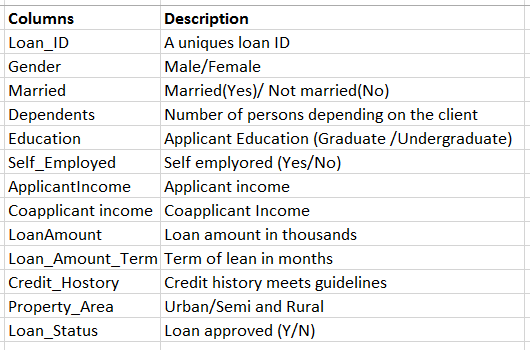

<h3>Plan of attack</h3>
1. High level analysis<br>
2. Preprocessing<br>
3. Data analysis<br>
4. Vectorization<br>
5. Build ML Model

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h4>Read data</h4>

In [115]:
train_data = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

<h4>1. High level analysis</h4>

In [116]:
train_data.shape

(614, 13)

In [117]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [118]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [119]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<h4>2. Preprocessing</h4>

While doing preprocessing, we will apply the same preprocecssing to test data. Here a thing to note that we will do our analysis based on train data and apply the result to both train and test data. This is because if we include test data for analysis, the data leakage will happen and our model will overfit.

In [120]:
# Lets load test data
test_data = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

<h5>i. Convert missing values to NaN </h5>

In [121]:
train_data = train_data.replace(' ',np.nan)
train_data.isna().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

<h5>ii. Replace Nulls with most frequent values (mode) </h5>

In [122]:
# Check number of NaNs for each feature
train_data.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [123]:
# A function which iterates through each categorical feature and replace 'null' with mode
features = ["Credit_History", "Self_Employed", "Dependents", "Loan_Amount_Term", "Gender", "Married" ]

for f in features:
    print("Before imputation:\n", train_data[f].value_counts())
    train_data[f] = train_data[f].fillna( train_data[f].dropna().mode().values[0] )
    test_data[f] = test_data[f].fillna( train_data[f].dropna().mode().values[0] )
    print("\nAfter imputation:\n", train_data[f].value_counts())
    print("="*50)

Before imputation:
 1.0    475
0.0     89
Name: Credit_History, dtype: int64

After imputation:
 1.0    525
0.0     89
Name: Credit_History, dtype: int64
Before imputation:
 No     500
Yes     82
Name: Self_Employed, dtype: int64

After imputation:
 No     532
Yes     82
Name: Self_Employed, dtype: int64
Before imputation:
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

After imputation:
 0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Before imputation:
 360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

After imputation:
 360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Before imputation:
 Male      489
Female    112
Name: Gender, dtype: int64

After imputation:
 Male      502
Female    112
Name: Gender, d

In [124]:
# For LoanAmount, we will replace NaNs with mean()
print("Before imputation: ",train_data['LoanAmount'].value_counts())
train_data['LoanAmount'] = train_data['LoanAmount'].fillna(train_data['LoanAmount'].dropna().mean())
test_data['LoanAmount'] = test_data['LoanAmount'].fillna(train_data['LoanAmount'].dropna().mean())
print("After imputation: ",train_data['LoanAmount'].value_counts())

Before imputation:  120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64
After imputation:  146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


In [102]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [103]:
train_data.to_csv("preprocessed_trained_data.csv", index=False)

In [125]:
test_data.to_csv("preprocessed_test_data.csv", index=False)